# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [27]:
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [28]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv(r"D:\Datatrained Project\Baseball\baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


column name - W - winner W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

R - Runs scored: number of times a player crosses home plate

AB - At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

H Hits allowed: total hits allowed

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

HR (or HRA) – Home runs allowed: total home runs allowed

BB - Base on balls (also called a "walk"): times pitching four balls, allowing the batter to take first base

SO - number of batters who received strike three

SB - Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

RA - Run average: number of runs allowed times nine divided by innings pitched

ER - Earned run: number of runs that did not occur as a result of errors or passed balls

ERA - Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG - Caught stealing: times tagged out while attempting to steal a base

SHO - Shutout: number of complete games pitched with no runs allowed

SV - Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E - Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [4]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.tail(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
#Descripition of statics  data
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# EDA(Exploratary data analysis)

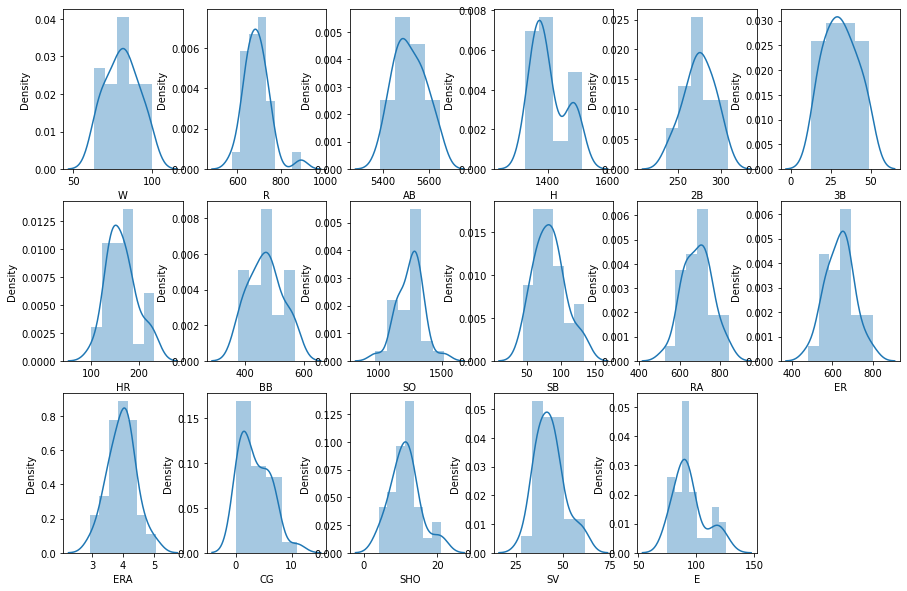

In [8]:
plt.figure(figsize=(15,10))
plotnumber=1

for column in df:
    if plotnumber<=18: #as there are 12 columns in data
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [9]:
#Coorelation 
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:title={'center':'Correlation with Win'}>

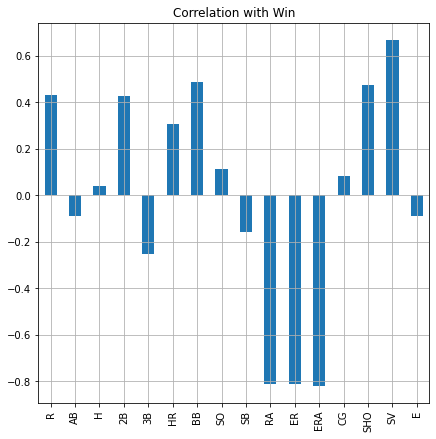

In [10]:
# visualize the correlation
df.drop('W', axis =1).corrwith(df['W']).plot(kind ='bar',grid = True, figsize = (7,7),
                                                   title = 'Correlation with Win')

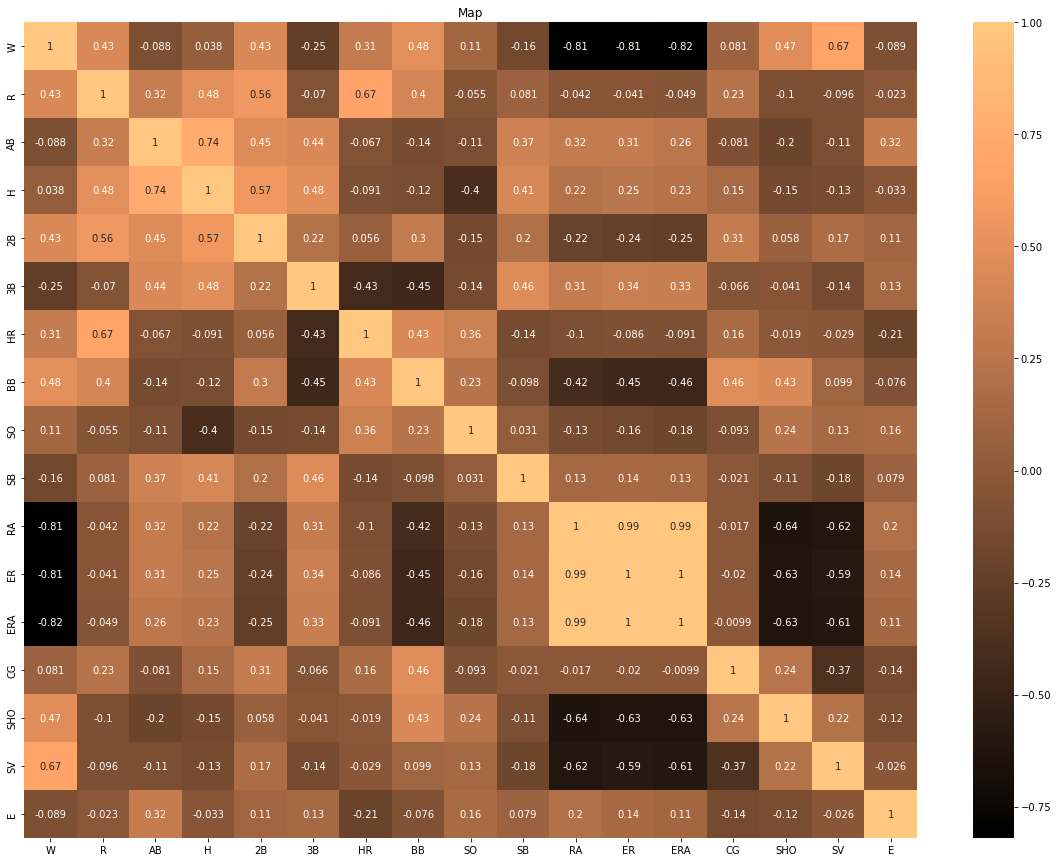

In [12]:
#Heat Map for correlation
# Now we will see the coorelations between the data and the quality 
corr_matrix  =df.corr()
#size of the canvas 
plt.rcParams['figure.figsize'] = (20, 15)
#plor the correlation matrix
sns.heatmap(corr_matrix, cmap = 'copper', annot = True)
plt.title('Map')
plt.show()

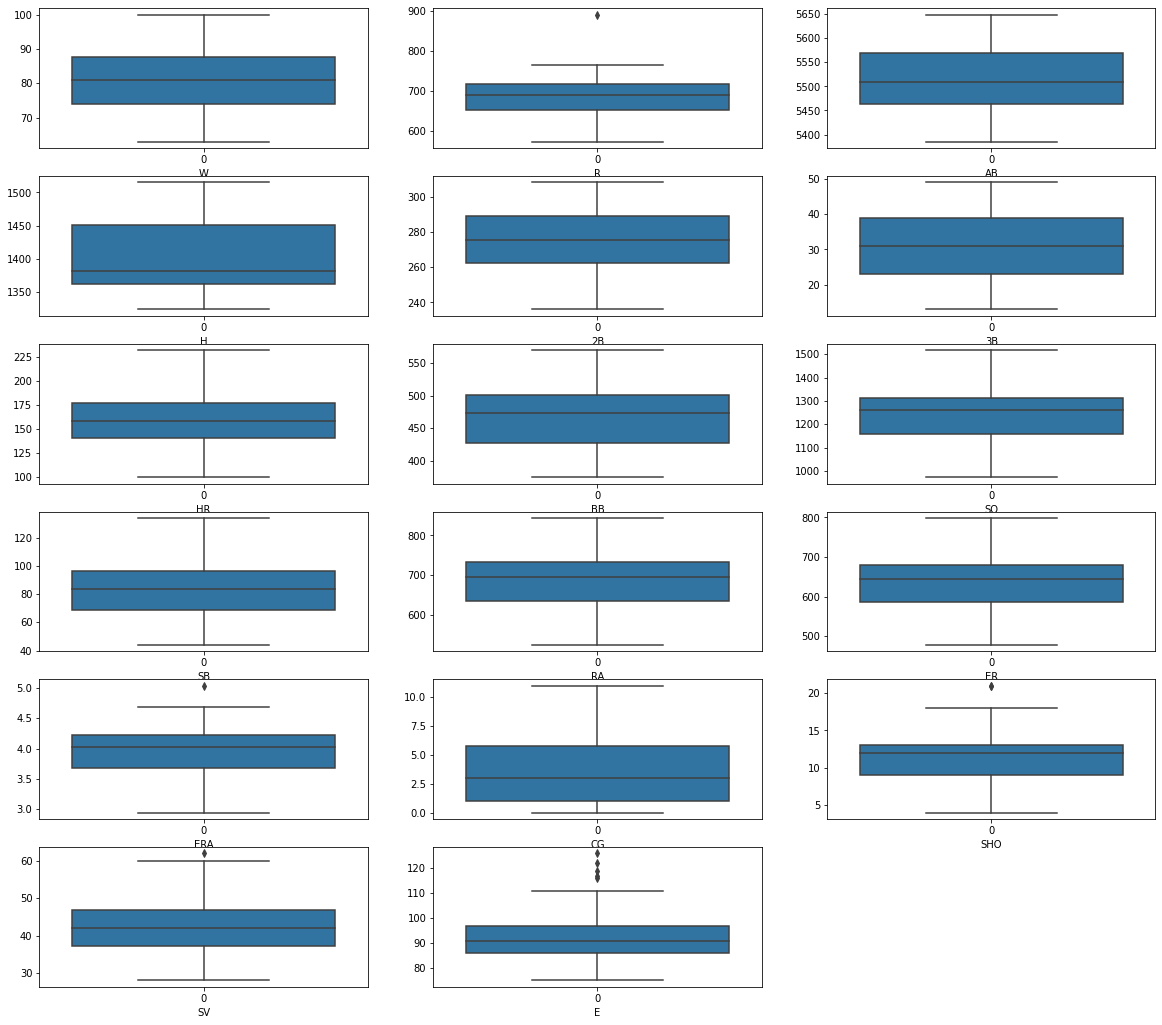

In [13]:
#checking for outliers
plt.figure(figsize=(20,18))
graph=1

for column in df:
    if graph<=18:
        ax=plt.subplot(6,3,graph)
        sns.boxplot(data = df[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()


In [15]:
#outliers removal
df.shape

(30, 17)

In [19]:
# Z score method
import scipy.stats as stats
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

data_df=df[(z<3).all(axis=1)]
data_df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


Removed the outliers using Z score method 

# Spiliting the dataset into two variables to train and test

In [32]:
X = df.drop(columns = ['W'],axis=1)
Y = df['W']

# VIf (Varience Influence Factor)

In [29]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

   Features     VIF Value
0         R   1638.985029
1        AB   4277.157018
2         H   4698.798408
3        2B    904.439835
4        3B     32.435486
5        HR    285.773237
6        BB    269.485018
7        SO    398.234104
8        SB     28.654970
9        RA  17204.829356
10       ER  49837.289228
11      ERA  23551.544014
12       CG      6.771036
13      SHO     30.276598
14       SV    119.686080
15        E     94.215202


# Scaling the data using Standard Scaler

In [30]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


# Training and test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)
#I have taken 30 percent as the test data and remaining 70 percent as the train data

# Machine Learning Models

In [34]:
def model1(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [35]:
#Linear Regression Model
Model=LinearRegression()
model1(Model,X,Y)

RMSE Score is: 6.563480464865668
R2 Score is: 43.74849730662906
Cross Validation Score: 4.075540667463855
R2 Score - Cross Validation Score is 39.67295663916521


In [36]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
model1(model, X, Y)

RMSE Score is: 8.498300631805595
R2 Score is: 5.696043140090479
Cross Validation Score: -69.45681309147666
R2 Score - Cross Validation Score is 75.15285623156714


In [37]:
#Decision tree regressor

model=DecisionTreeRegressor()
model1(model,X,Y)

RMSE Score is: 11.604596790352806
R2 Score is: -75.84330794341676
Cross Validation Score: -232.77711384151633
R2 Score - Cross Validation Score is 156.93380589809956


In [38]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
model1(model, X, Y)

RMSE Score is: 11.853269591129697
R2 Score is: -83.46028291621327
Cross Validation Score: -217.73869474646403
R2 Score - Cross Validation Score is 134.27841183025077


In [39]:
# SGD Regressor

model=SGDRegressor(penalty='l1', max_iter=2000, learning_rate='optimal')
model1(model, X, Y)

RMSE Score is: 9.670119072899953e+19
R2 Score is: -1.2210385577897296e+40
Cross Validation Score: -5.494634952362709e+40
R2 Score - Cross Validation Score is 4.2735963945729793e+40


In [40]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
model1(model, X, Y)

RMSE Score is: 13.437752355940498
R2 Score is: -135.78653542491978
Cross Validation Score: -134.4630580456287
R2 Score - Cross Validation Score is -1.323477379291063


In [41]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
model1(model, X, Y)

RMSE Score is: 7.1184456532671865
R2 Score is: 33.83381695079195
Cross Validation Score: -76.96084721935877
R2 Score - Cross Validation Score is 110.79466417015072


# Hyperparameter Tuning

In [42]:
# Choosing Support Vector Regression

fmod_param = {'kernel' : ['poly', 'sigmoid', 'rbf'], 
              'C' : [2.0, 3.0, 4.0], 
              'gamma' : ['scale', 'auto'], 
              'epsilon' : [0.2, 0.3, 0.4], 
              'shrinking' : [True, False]}

In [43]:
GSCV = GridSearchCV(SVR(), fmod_param, cv=5)

In [44]:
Final_Model = SVR(C=4.0, epsilon=0.4, gamma='scale', kernel='rbf', shrinking=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: -61.56793907747442


In [45]:
filename = "FinalModel_4.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_4.pkl']

In [47]:
Y_preds=model.predict(X_test)
predicted=pd.DataFrame(Y_preds,columns=['predicted'])
predicted

,predicted
0,81.000000
1,77.600000
2,76.000000
3,77.333333
4,80.250000
5,85.000000
6,64.000000
7,80.333333
8,79.600000
